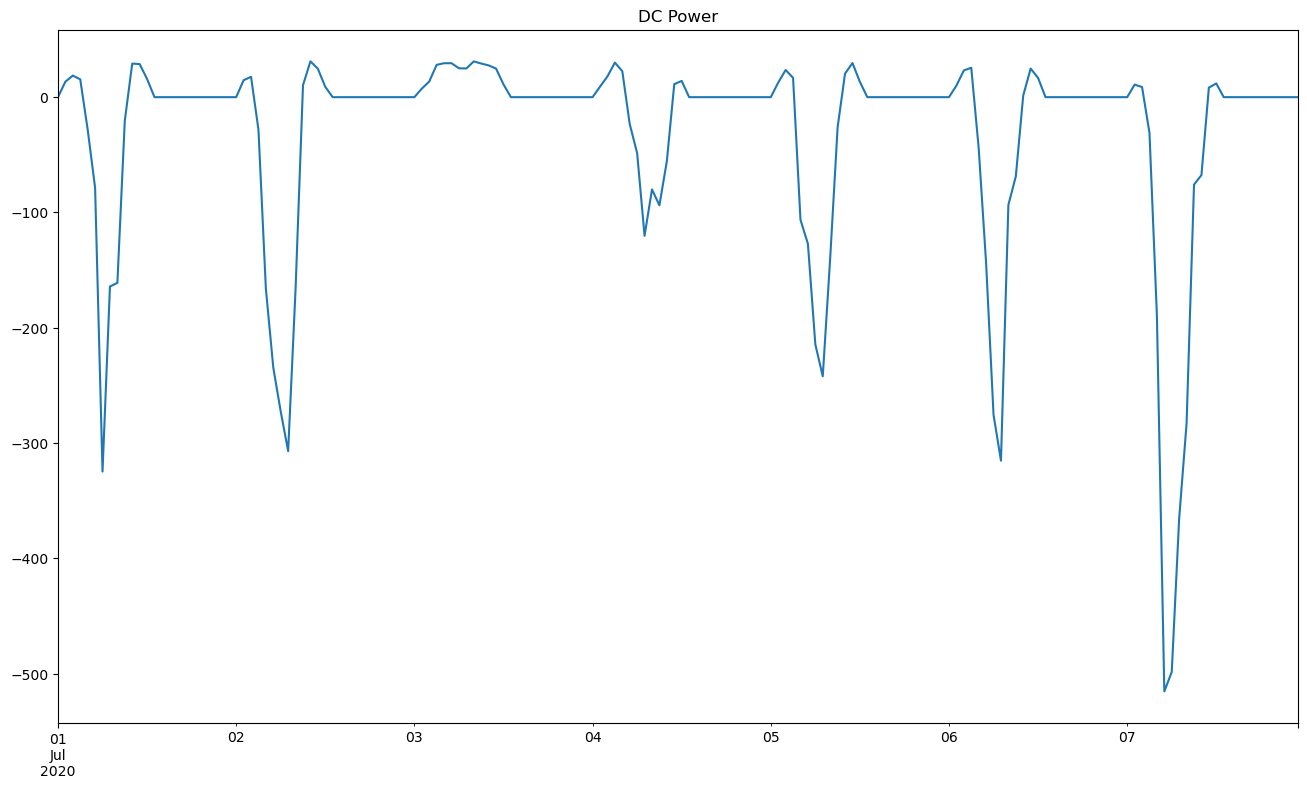

In [11]:
import pvlib 
from pvlib.location import Location
import pandas as pd

import matplotlib.pyplot as plt

celltype ='monoSi'
pdc0 = 400
v_mp = 44.1
i_mp = 9.08
v_oc= 53.4
i_sc = 9.60
alpha_sc = 0.0005 * i_mp
beta_voc = -0.0029 * v_mp
gamma_pdc = -0.0037
cells_in_series = 6*27
temp_ref = 25

location = Location(latitude = 9.948427642217785, longitude = 76.56928756213607, tz = 'Indian/Maldives', altitude = 30, name = 'Home')

surface_tilt=45
surface_azimuth=180, #south

start = "2020-07-01 00:00"
end = "2020-07-07 23:00"

poa_data_2020 = pd.read_csv("poa_data_2020_api.csv", index_col=0)
poa_data_2020.index = pd.date_range(start="2020-01-01 00:00",
                                    periods=len(poa_data_2020.index),
                                    freq="h")

poa_data_2020 = poa_data_2020[start:end]

solarpos = location.get_solarposition(times=pd.date_range(start=start, end=end,
                                                          freq='h'))
aoi = pvlib.irradiance.aoi(
    surface_tilt,surface_azimuth,solarpos.apparent_zenith, solarpos.azimuth
)
iam = pvlib.iam.ashrae(aoi)
effective_irradience = poa_data_2020["poa_direct"] * iam + poa_data_2020["poa_diffuse"]

temp_cell = pvlib.temperature.faiman(poa_data_2020["poa_global"], poa_data_2020["temp_air"],
                                     poa_data_2020["wind_speed"])

results_dc = pvlib.pvsystem.pvwatts_dc(effective_irradience,
                                         temp_cell,
                                         pdc0,
                                         gamma_pdc=gamma_pdc,
                                         temp_ref=25)

results_dc.plot(figsize=(16,9))
plt.title("DC Power")
plt.show()

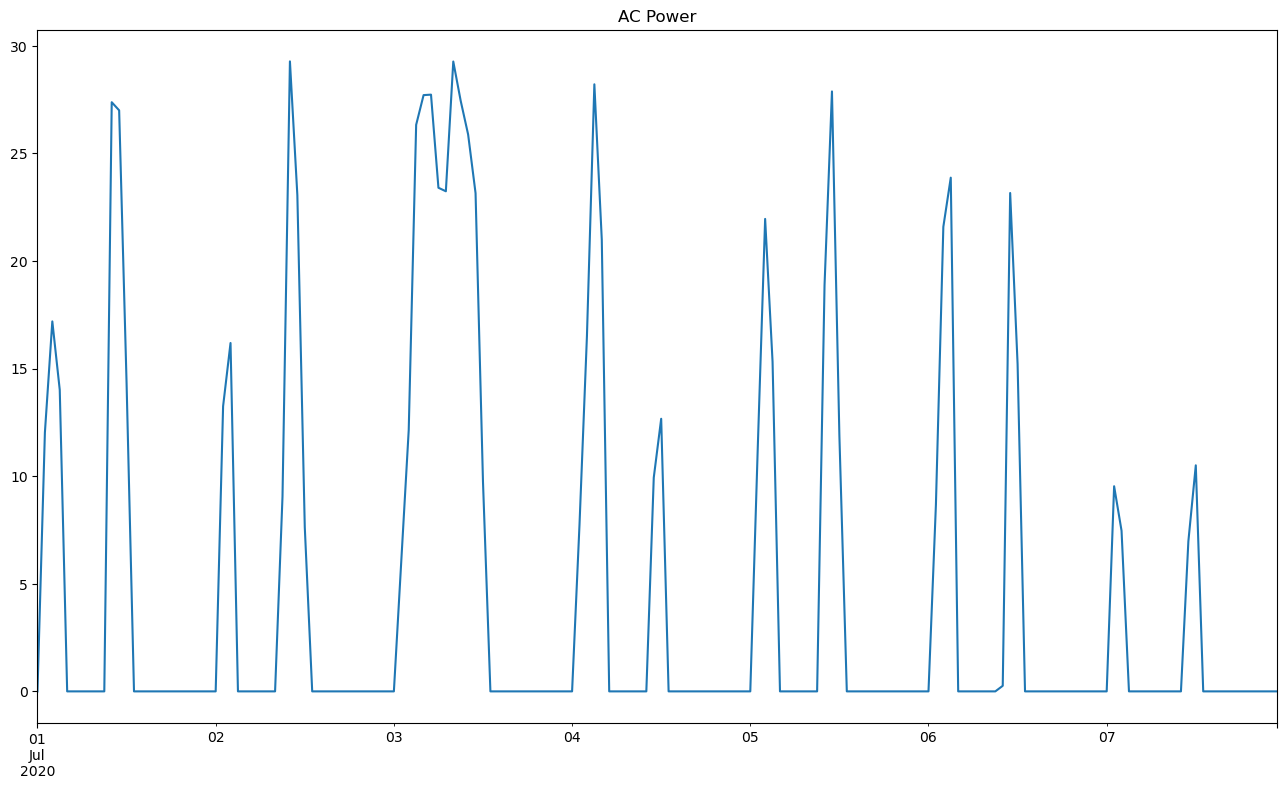

In [12]:
results_ac = pvlib.inverter.pvwatts(pdc=results_dc,
                                    pdc0=200,
                                    eta_inv_nom=0.961,
                                    eta_inv_ref=0.9637)

results_ac.plot(figsize=(16,9))
plt.title("AC Power")
plt.show()